In [ ]:
https://bethesdamagazine.com/bethesda-beat/coronavirus/montgomery-county-coronavirus-cases-increase-21-in-a-week/
This story was updated at 2:04 p.m. on May 17, 2020 to clarify single-digit percentage increases.
Montgomery County coronavirus cases increase 21% in a week
There have been 8,206 cases and 437 deaths in the county

In [ ]:
https://www.aljazeera.com/news/2020/04/anti-lockdown-protests-200420180415064.html
    
Meanwhile, ReOpen Maryland, which held its first rally in Annapolis on April 18 and was reportedly attended by hundreds, was organised by Evie Harris, who told The Guardian that the protest in Michigan was an inspiration.

## Using my CountyData module to get the county Lansing is in

In [ ]:
https://plotly.com/python/county-choropleth/

In [ ]:
from CountyData import *
city = "Annapolis"
state = "Maryland"
getcnty(city,state)

# To get an updated list of deaths

In [ ]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")

# Create an empty list
ALLdata=[]

URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
print (len(lines))
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    #convert the splitlines to strings
    line= str(line).split(",")
    ALLdata.append(line)

## Print The header too see the location of desired fields and current dates 

In [51]:
cnt = 0
for line in ALLdata:
    cnt=cnt+1
    if cnt == 1:
        print(line) 
        print("-----------")
    if cnt == 1:print(line[5],line[6])    
    if cnt == 100:print(line[5],line[6])

NameError: name 'ALLdata' is not defined

## Using 'Admin2' as County and  'Province_State' as State

In [ ]:
for i in range(0, len(ALLdata)):
    if "Anne Arundel" in ALLdata[i][5] and ALLdata[i][6] =="Maryland":
        print("ID=",i,"\n",ALLdata[i])
        ID = i
print(ID)        

In [ ]:
print(len(ALLdata[0]))
dates = str(ALLdata[0]).split(",")
print(dates[99])

print (129-99)

In [ ]:
# ID is given value two cells up
deaths = ALLdata[ID][14:]
# Deaths  is a list of strings
# Each number is enclosed in ''  That means it is a string.
# example: '0', '0', '1', '2', '3', '3' 
print (deaths)
# Convert the strings to integers
# map the 'list of deaths' to a list of integers 
CleanData = list(map(int, deaths))
# notice now the digits are not surrounded by '' example:  0, 0, 1, 2, 3, 3,
print("------ integers -----------")
print (CleanData)


In [ ]:
#ProtestDate = str(ALLdata[0]).split(",")[111]
#print (ProtestDate)

ProtestDate = str(ALLdata[0]).split(",")[99]
print (ProtestDate)

In [ ]:
# Now get the amount of increase day by day
GRAPHdata = []
for i in range(0, len(CleanData)-1):
    print(CleanData[i+1]-CleanData[i], end=" ")
    GRAPHdata.append(CleanData[i+1]-CleanData[i])   

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.asarray(range(0, len(GRAPHdata)))
y = np.asarray(GRAPHdata)

xx = np.asarray(range(0, len(CleanData)))
yy = np.asarray(CleanData)

fig, axs = plt.subplots(2)
#fig, ax = plt.subplots()
axs[0].grid(color='lightgray', linestyle='-', linewidth=1)
axs[0].grid(True)
axs[0].plot(xx, yy, '-b', label='Linear Plot of Deaths in Douglas County, Co')
#leg = axs[0].legend();
axs[1].grid(color='lightgray', linestyle='-', linewidth=1)
axs[1].grid(True)
axs[1].plot(x, y, '-r', label='Day by Day Variation')
#plt.axis('equal')
#leg = axs[1].legend();


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.asarray(range(0, len(GRAPHdata)))
y = np.asarray(GRAPHdata)

xx = np.asarray(range(0, len(CleanData)))
yy = np.asarray(CleanData)

fig, ax = plt.subplots()
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.plot(xx, yy, '-b', label='Linear Plot of Deaths in Douglas County, Co')
leg = plt.legend();
plt.show()
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.plot(x, y, '-r', label='Day by Day Variation')

leg = plt.legend();
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
x = np.asarray(range(0,len(GRAPHdata)))
y = np.asarray(GRAPHdata)
inc = len(GRAPHdata)/10
print(inc)

fig = plt.figure(num=None, figsize=(6,6), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, len(x), inc)
minor_ticks = np.arange(0, len(y), 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)


#plt.figure()
poly = np.polyfit(x,y,inc)
poly_y = np.poly1d(poly)(x)
plt.plot(x,poly_y)
plt.plot(x,y)
plt.scatter(99, .5, s=10,color="black", zorder=3)

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)

def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 

print("i: ",ID)
ProtestDate = "ProtestDate: "+str(ALLdata[0]).split(",")[99]
TExt = listToString(ALLdata[ID][5:7])
total = "Total Deaths to Date: "+str(ALLdata[ID][-1])
plt.text(0,7.8, TExt, fontsize=20, color="red")
plt.text(0,7, total, fontsize=20, color="red")
plt.text(0,6.5, ProtestDate, fontsize=14, color="blue")
plt.xlabel('First Data Record: January 21, 2020\nhttps://raw.githubusercontent.com/CSSEGISandData/\nCOVID-19/master/csse_covid_19_data/\ncsse_covid_19_time_series/time_series_covid19_deaths_US.csv', fontsize=14)
plt.title('Day by Day Death Variations from:\n https://github.com/JupyterJones\n/COVID-19-Jupyter-Notebooks\n Orange is actual, Blue is smoothed', fontsize=15)
plt.ylabel('- Variation -', fontsize=18, color="white")
filename = "images/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
list_x = np.asarray(range(0,len(GRAPHdata)))
list_y = np.asarray(GRAPHdata)
inc = len(GRAPHdata)/10
print(inc)

fig = plt.figure(num=None, figsize=(6,6), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#plt.figure()
poly = np.polyfit(list_x,list_y,inc)
poly_y = np.poly1d(poly)(list_x)
plt.plot(list_x,poly_y)
plt.plot(list_x,list_y)
plt.scatter(99, .5, s=10,color="black", zorder=3)

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)

def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 

print("i: ",ID)
ProtestDate = "Black Dot: "+str(ALLdata[0]).split(",")[99]
TExt = listToString(ALLdata[ID][5:7])
total = "Total Deaths to Date: "+str(ALLdata[ID][-1])
plt.text(0,7.8, TExt, fontsize=20, color="red")
plt.text(0,6.7, total, fontsize=20, color="red")
plt.text(0,6, ProtestDate, fontsize=14, color="blue")
plt.xlabel('First Data Record: January 21, 2020\nhttps://raw.githubusercontent.com/CSSEGISandData/\nCOVID-19/master/csse_covid_19_data/\ncsse_covid_19_time_series/time_series_covid19_deaths_US.csv', fontsize=14)
plt.title('Day by Day Death Variations from:\n https://github.com/JupyterJones\n/COVID-19-Jupyter-Notebooks\n Orange is actual, Blue is smoothed', fontsize=15)
plt.ylabel('- Variation -', fontsize=18, color="white")
filename = "images/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
list_x = np.asarray(range(0,len(GRAPHdata)))
list_y = np.asarray(GRAPHdata)
inc = len(GRAPHdata)/10
print(inc)

fig = plt.figure(num=None, figsize=(12,12), dpi=120, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#plt.figure()
poly = np.polyfit(list_x,list_y,inc)
poly_y = np.poly1d(poly)(list_x)
plt.plot(list_x,poly_y)
plt.plot(list_x,list_y)
plt.scatter(110, .5, s=10,color="black", zorder=3)

ax.grid(color='lightgray', linestyle='-', linewidth=1)

plt.grid(True)

def listToString(s):  
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s)) 
i=ID
print("i: ",i)        
ProtestDate = "Black Dot: "+str(ALLdata[0]).split(",")[99]
TExt = listToString(ALLdata[ID][5:7])
total = "Total Deaths to Date: "+str(ALLdata[ID][-1])
plt.text(0,7.8, TExt, fontsize=20, color="red")
plt.text(0,6.7, total, fontsize=20, color="red")
plt.text(0,6, ProtestDate, fontsize=14, color="blue")
plt.xlabel('- Time Span -\nFirst Data Record : January 21, 2020\nhttps://raw.githubusercontent.com/CSSEGISandData/COVID-19/master\n/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv', fontsize=18)
plt.title('Plotting Day by Day Death Variations from:\n https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks\n Orange is actual, Blue is smoothed', fontsize=18)
plt.ylabel('- Variation -', fontsize=18, color="white")
filename = "images/"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

### Some Misc Time Zone stuff

In [ ]:
from datetime import datetime
from pytz import timezone
tz = timezone('EST')
print (datetime.now(tz))

In [ ]:
from datetime import datetime
from datetime import timedelta
from pytz import timezone
tz = timezone('EST')
print (datetime.now(tz)- timedelta(3))
#d = date.today() - timedelta(days_to_subtract)

In [37]:
import uscities
data = uscities.DATA
data= data.split("\n")
cnt = 0
for line in data:
    lines = line.split(",")
    cnt=cnt+1
    if cnt==1:print(line,"\n\n")
    if cnt>1 and cnt<20:
        print(lines[0],lines[3],lines[6],lines[7],lines[8],lines[9],)

"city","city_ascii","state_id","state_name","county_fips","county_name","county_fips_all","county_name_all","lat","lng","population","density","source","military","incorporated","timezone","ranking","zips","id" 


"South Creek" "Washington" "53053" "Pierce" "46.9994" "-122.3921"
"Roslyn" "Washington" "53037" "Kittitas" "47.2507" "-121.0989"
"Sprague" "Washington" "53043" "Lincoln" "47.3048" "-117.9713"
"Gig Harbor" "Washington" "53053" "Pierce" "47.3352" "-122.5968"
"Lake Cassidy" "Washington" "53061" "Snohomish" "48.0639" "-122.0920"
"Tenino" "Washington" "53067" "Thurston" "46.8537" "-122.8607"
"Jamestown" "Washington" "53009" "Clallam" "48.1229" "-123.0911"
"Three Lakes" "Washington" "53061" "Snohomish" "47.9420" "-121.9924"
"Curlew Lake" "Washington" "53019" "Ferry" "48.7311" "-118.6663"
"Chain Lake" "Washington" "53061" "Snohomish" "47.9038" "-121.9861"
"Pateros" "Washington" "53047" "Okanogan" "48.0536" "-119.8994"
"Rosburg" "Washington" "53069" "Wahkiakum" "46.3076" "-123.6344"


In [39]:
import uscities
data = uscities.DATA
data= data.split("\n")
cnt = 0
for line in data:
    lines = line.split(",")
    cnt=cnt+1
    if cnt==1:print(line,"\n\n")
    if cnt>1 and cnt<20:
        print(lines[6],end =', ')

"city","city_ascii","state_id","state_name","county_fips","county_name","county_fips_all","county_name_all","lat","lng","population","density","source","military","incorporated","timezone","ranking","zips","id" 


"53053", "53037", "53043", "53053", "53061", "53067", "53009", "53061", "53019", "53061", "53047", "53069", "53053", "53073", "53053", "53035", "53047", "53075", 

In [41]:
import plotly.express as px

fig = px.choropleth(locations=["WA"], locationmode="USA-states", color=[3], scope="usa")
fig.show()

In [ ]:
https://plotly.com/python/choropleth-maps/

In [46]:
import plotly.figure_factory as ff
import plotly.express as px
fips = ["53053", "53037", "53043", "53053", "53061", "53067", "53009", "53061", "53019", "53061", "53047", "53069", "53053", "53073", "53053", "53035", "53047", "53075"]
values = range(len(fips))


fig = px.choropleth(locations=["WA"], locationmode="USA-states", color=[3], scope="usa")
fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()


In [42]:
import plotly.figure_factory as ff

fips = ["53053", "53037", "53043", "53053", "53061", "53067", "53009", "53061", "53019", "53061", "53047", "53069", "53053", "53073", "53053", "53035", "53047", "53075"]
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()


In [20]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd
fig = plt.figure(num=None, figsize=(12,12), dpi=120, facecolor='salmon')
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'Maryland']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Maryland'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

<Figure size 1440x1440 with 0 Axes>

In [24]:
!mkdir BaseMap



 24
[2, 25, 40, 35, 2, 0, 12, 3, 11, 0, 15, 0, 5, 7, 2, 81, 74, 1, 0, 1, 0, 1, 3, 0]


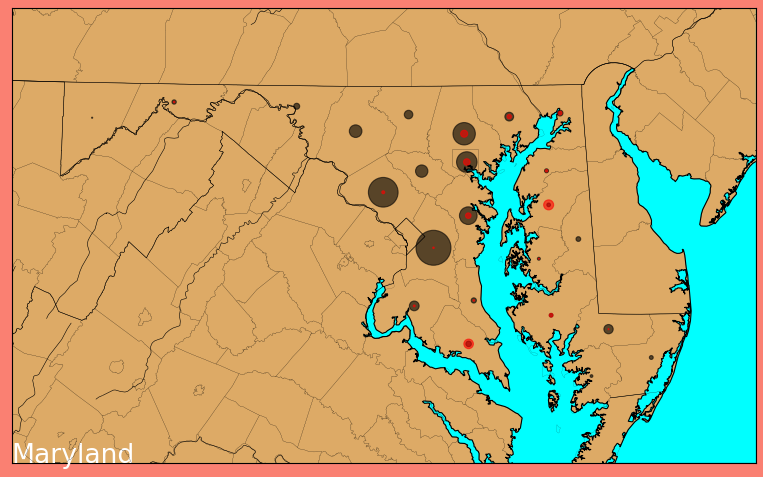

In [32]:
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
"""
When I tried to draw counties, I got error: basemap 'utf-8' codec can't decode byte 0xf1 in position
Answered on https://stackoverflow.com/questions/45660904/matplotlib-basemap-drawcounties-having-issues

Budi said, for me, i change return v.decode(encoding, encodingErrors) to return v.decode('latin-1') and it's works,, – Budi Mulyo May 27 '19 at 8:12

My file looked different than you described: so I opened /miniconda3/lib/python3.7/site-packages/shapefile.py and replaced all instances of 'utf-8' with 'latin-1' Itt works fine now. 
Thank you very much. – JackNorthrup 3 mins ago

"""
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv"

DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = "Maryland"
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        if int(line[7])>0:LAT.append(line[5])
        if int(line[7])>0:LONG.append(line[6])
        if int(line[8])>0:LATd.append(line[5])
        if int(line[8])>0:LONGd.append(line[6])            
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)
fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
# make up some data for scatter plot
lats = LT
lons = LG
latsd = LTd
lonsd = LGd

fig = plt.gcf()
fig.set_size_inches(12, 8)


m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,
             resolution='h', projection='tmerc', lat_0 = lat_0, lon_0 = lon_0)

m.readshapefile(r'ShapeFiles/state_bounds', 'Neighborhoods')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers()
m.drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, drawbounds=False, zorder=20)
#m.drawcounties(zorder=20)
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.2)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
print(Sized)

x, y = m(lons, lats)  # transform coordinates 
plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=.6)

xd, yd = m(lonsd, latsd)  # transform coordinates 
plt.scatter(xd, yd,  s=sd, color="red", zorder=6, alpha=.6)
plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
filename = "BaseMap/"+search+"Counties__.png"
plt.savefig(filename, dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()



 24
[2, 25, 40, 35, 2, 0, 12, 3, 11, 0, 15, 0, 5, 7, 2, 81, 74, 1, 0, 1, 0, 1, 3, 0]


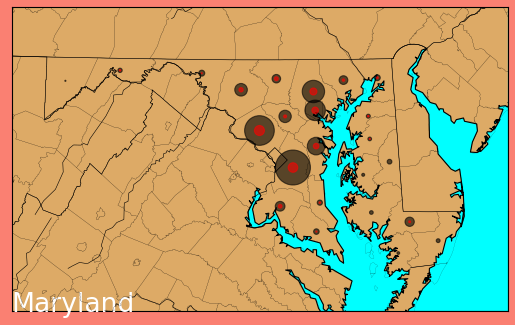

In [29]:
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
"""
When I tried to draw counties, I got error: basemap 'utf-8' codec can't decode byte 0xf1 in position
Answered on https://stackoverflow.com/questions/45660904/matplotlib-basemap-drawcounties-having-issues

Budi said, for me, i change return v.decode(encoding, encodingErrors) to return v.decode('latin-1') and it's works,, – Budi Mulyo May 27 '19 at 8:12

My file looked different than you described: so I opened /miniconda3/lib/python3.7/site-packages/shapefile.py and replaced all instances of 'utf-8' with 'latin-1' Itt works fine now. 
Thank you very much. – JackNorthrup 3 mins ago

"""
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv"

DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = "Maryland"
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
# make up some data for scatter plot
lats = LT
lons = LG

fig = plt.gcf()
fig.set_size_inches(8, 6.5)


m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,
             resolution='i', projection='tmerc', lat_0 = lat_0, lon_0 = lon_0)

m.readshapefile(r'ShapeFiles/state_bounds', 'Neighborhoods')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers()
m.drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, drawbounds=False, zorder=20)
#m.drawcounties(zorder=20)
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.2)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
print(Sized)

x, y = m(lons, lats)  # transform coordinates 
plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=.6)
plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=.6)
plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
filename = "BaseMap/"+search+"Counties__.png"
plt.savefig(filename, dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()

/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



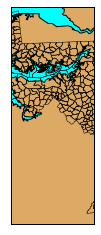

In [17]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

#'-79.487651 37.911717 -75.048939 39.723043')

#map = Basemap(-75.048939,  39.723043, -79.487651,37.911717,
#             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)


#map = Basemap(-79.487651, 37.911717, -75.048939, 39.723043,
#             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

map = Basemap(llcrnrlon=-79.487651,llcrnrlat=37.911717,urcrnrlon=-75.048939,urcrnrlat=39.723043,
             resolution='i', projection='lcc', lat_0 =38.9 , lon_0 = 76.6)


#m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
#        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)



map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()

map.readshapefile('Maryland/tl_2014_24_cousub', 'Maryland')

plt.show()

In [3]:
!ls Maryland

tl_2014_24_cousub.zip


In [5]:
!ls *.py

CountyData.py  GETGMT.py  US_State_Bounding_Boxes.py


In [8]:
from US_State_Bounding_Boxes import *
COOR("Maryland")

('Maryland', '-79.487651 37.911717 -75.048939 39.723043')

In [7]:
import US_State_Bounding_Boxes
help(US_State_Bounding_Boxes)

Help on module US_State_Bounding_Boxes:

NAME
    US_State_Bounding_Boxes

FUNCTIONS
    COOR(state)
    
    GetCOOR(state)

DATA
    DATA = '\nNAME  xmin ymin xmax ymax\nAlabama  -88.473227 3...ming  -11...

FILE
    /home/jack/Desktop/Covid-19_Research_Notebooks/US_State_Bounding_Boxes.py




In [50]:
import folium
import pandas as pd


url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.1,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [48]:
!pip install folium

     |████████████████████████████████| 102kB 548kB/s ta 0:00:01
